**Instituto Tecnológico y de Estudios Superiores de Monterrey**

>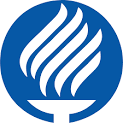

**Matemáticas y ciencia de datos para la toma de decisiones (Gpo 602)**

**Fase 3 y 4: limpieza, preparación de los datos y modelación de los datos**

**Alumna:**
>Ana Itzel Hernández García | A01737526

**Profesoras**

*Azucena Bolaños Carrera*

*Mariana Olivares Avalos*

28/05/2023

In [ ]:
# importing modules and packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

**Carga de datos**

In [ ]:
#Carga del archivo
datos_consumo = pd.read_excel('A01737526_EtiquetasNutrimentales.xlsx')
datos_consumo

,Fecha,Momento,Nombre,Calorias (kcal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
0,2023-02-21,Desayuno,Avena con fruta,190,37.81,2.29,6.18,260.0
1,2023-02-21,Desayuno,Chocolate caliente,190,5.47,29.90,8.80,95.0
2,2023-02-21,Comida,Sandwich,339,17.54,25.75,18.76,1323.0
3,2023-02-21,Comida,Papas fritas,153,10.49,13.93,1.84,147.0
4,2023-02-21,Cena,Palomitas,148,7.60,17.00,2.90,250.0
...,...,...,...,...,...,...,...,...
221,2023-05-16,Desayuno,café,38,0.00,9.53,0.26,5.0
222,2023-05-16,Comida,Carne al pastor,210,0.00,17.50,13.20,680.0
223,2023-05-16,Comida,Refresco,130,0.00,34.00,0.00,20.0
224,2023-05-16,Cena,Gelatina de chocolate,129,19.10,3.20,5.90,65.0


In [ ]:
#Primeros 5 alimentos del registro
datos_consumo.head()

,Fecha,Momento,Nombre,Calorias (kcal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
0,2023-02-21,Desayuno,Avena con fruta,190,37.81,2.29,6.18,260.0
1,2023-02-21,Desayuno,Chocolate caliente,190,5.47,29.90,8.80,95.0
2,2023-02-21,Comida,Sandwich,339,17.54,25.75,18.76,1323.0
3,2023-02-21,Comida,Papas fritas,153,10.49,13.93,1.84,147.0
4,2023-02-21,Cena,Palomitas,148,7.60,17.00,2.90,250.0


In [ ]:
#Ver los nombres de las columnas
datos_consumo.columns

Index(['Fecha', 'Momento', 'Nombre', 'Calorias (kcal)', 'Carbohidratos (g)',
       'Lípidos (g)', 'Proteína (g)', 'Sodio (mg)'],
      dtype='object')

In [ ]:
#Agrupar por la categoria "Momento" (Desayuno, Comida, Cena y snack)
datos_consumo.groupby('Momento').count()

,Fecha,Nombre,Calorias (kcal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
Momento,,,,,,,
Cena,74,74,74,74,74,74,74
Comida,78,78,78,78,78,78,78
Desayuno,65,65,65,65,65,65,65
Snack,9,9,9,9,9,9,9


In [ ]:
#Estadistica descriptiva
datos_consumo.describe()

,Calorias (kcal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
count,226.000000,226.000000,226.000000,226.000000,226.000000
mean,167.818584,14.091726,13.145177,6.723894,245.211858
std,134.028381,18.158819,11.060100,8.026044,330.384544
min,8.000000,0.000000,0.000000,0.000000,0.000000
25%,38.500000,0.000000,3.630000,0.512500,5.000000
50%,142.000000,8.125000,9.530000,3.720000,126.000000
75%,223.000000,19.100000,19.500000,9.445000,284.000000
max,698.000000,90.000000,38.230000,34.810000,1378.000000


**Selección de los datos**

In [ ]:
#Datos numericos
datos=datos_consumo.iloc[:,3:]
datos

,Calorias (kcal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
0,190,37.81,2.29,6.18,260.0
1,190,5.47,29.90,8.80,95.0
2,339,17.54,25.75,18.76,1323.0
3,153,10.49,13.93,1.84,147.0
4,148,7.60,17.00,2.90,250.0
...,...,...,...,...,...
221,38,0.00,9.53,0.26,5.0
222,210,0.00,17.50,13.20,680.0
223,130,0.00,34.00,0.00,20.0
224,129,19.10,3.20,5.90,65.0


In [ ]:
#Indormación completa del nuevo DataFrame
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Calorias (kcal)    226 non-null    int64  
 1   Carbohidratos (g)  226 non-null    float64
 2   Lípidos (g)        226 non-null    float64
 3   Proteína (g)       226 non-null    float64
 4   Sodio (mg)         226 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.0 KB


**Limpiando Datos**

In [ ]:
#Para ver que no este vacio ningun espacio
datos.isnull()

,Calorias (kcal),Carbohidratos (g),Lípidos (g),Proteína (g),Sodio (mg)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
221,False,False,False,False,False
222,False,False,False,False,False
223,False,False,False,False,False
224,False,False,False,False,False


In [ ]:
#Otra forma
datos.isnull().sum()

Calorias (kcal)      0
Carbohidratos (g)    0
Lípidos (g)          0
Proteína (g)         0
Sodio (mg)           0
dtype: int64

**Preparando los datos**

In [ ]:
#Darle atrivutos a las variables X y
X = datos.drop('Calorias (kcal)', axis =1)
y = datos['Calorias (kcal)']

print(X)
print(y)

     Carbohidratos (g)  Lípidos (g)  Proteína (g)  Sodio (mg)
0                37.81         2.29          6.18       260.0
1                 5.47        29.90          8.80        95.0
2                17.54        25.75         18.76      1323.0
3                10.49        13.93          1.84       147.0
4                 7.60        17.00          2.90       250.0
..                 ...          ...           ...         ...
221               0.00         9.53          0.26         5.0
222               0.00        17.50         13.20       680.0
223               0.00        34.00          0.00        20.0
224              19.10         3.20          5.90        65.0
225               0.00         9.53          0.26         5.0

[226 rows x 4 columns]
0      190
1      190
2      339
3      153
4      148
      ... 
221     38
222    210
223    130
224    129
225     38
Name: Calorias (kcal), Length: 226, dtype: int64


In [ ]:
#Dividimos en 20% y 80% los datos
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

**Modelación de datos**

In [ ]:
#Se crea un modelo de regresión líneal
modelo = LinearRegression()


In [ ]:
# ajuste del modelo con las variables de entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Coficientes óptimos
x_columns = ['Carbohidratos (g)','Lípidos (g)', 'Proteína (g)', 'Sodio (mg)']
coeff_datos = pd.DataFrame(modelo.coef_, x_columns, columns=['Coeficientes'])
coeff_datos

,Coeficientes
Carbohidratos (g),4.923182
Lípidos (g),5.628267
Proteína (g),6.060856
Sodio (mg),-0.004065


In [ ]:
#Probamos el modelo con predicciones
predictions = modelo.predict(X_test)

In [ ]:
#Hacemos la validación de los datos
validation = pd.DataFrame({'Real':y_test,'Predicción':predictions,'Diferencia':y_test-predictions})

sample_validation = validation.head(15)
sample_validation

,Real,Predicción,Diferencia
93,596,552.642373,43.357627
30,212,255.709618,-43.709618
77,81,61.208198,19.791802
21,142,164.139503,-22.139503
105,180,264.667242,-84.667242
138,223,227.360015,-4.360015
179,61,47.580448,13.419552
64,210,161.150813,48.849187
59,153,126.017576,26.982424
111,230,226.280560,3.719440


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Calculamos el coeficiente de determinación R2
r2_score(y_test,predictions)

0.9409098193039697

**Visualización de los datos**

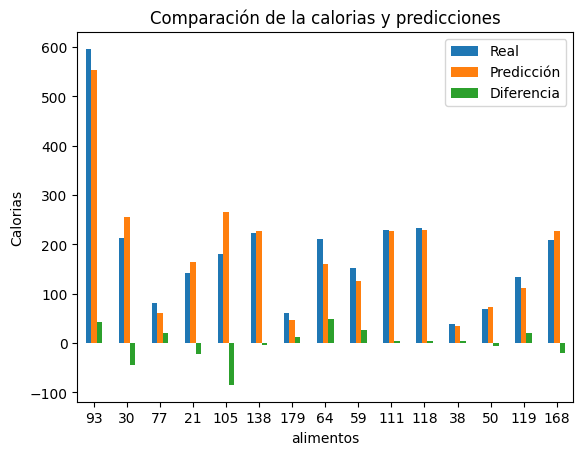

In [ ]:
#Gráfica de para la visualización de los datos y hacer la comparación de valores actuales y de predicción
sample_validation.plot.bar(rot=0)
plt.title("Comparación de la calorias y predicciones")
plt.xlabel("alimentos")
plt.ylabel("Calorias")
plt.show()

In [ ]:
#Calcular la suma total de las calorias
suma_calorias = datos["Calorias (kcal)"].sum()
suma_calorias # despliega el total de calorias

37927

In [ ]:
#Total de días diferentes de consumo
dia = datos_consumo["Fecha"].nunique()
dia # despliega el total de días unicos

45

**Promedio de las calorias**

In [ ]:
calorias_promedio = suma_calorias/dia # total de calorías consumidas entre el número de días que tomó consumirlas
print("Tu promedio de calorías consumidas en", dia,"días es:", round(calorias_promedio,2))

Tu promedio de calorías consumidas en 45 días es: 842.82


**Variables requeridas**

In [ ]:
peso = int(input("Inserte su peso en kilogramos: "))
altura = int(input("Inserte su estatura en centrimetros: "))
edad = int(input("Insertar la edad en años: "))
genero = input("Incerte M si es mujer o H si es hombre: ")

if(genero == "M"):
   calorias_requeridas = 655+(9.56*peso)+(1.85*altura)-(4.68*edad) # fórmula para estimar calorías requeridas en mujer
   print("Con base en tus datos, tu consumo de calorías al día debe ser de:", round(calorias_requeridas,2))

elif(genero == "H"):
  calorias_requeridas = 66.5+(13.75*peso)+(5*altura)-(6.8*edad) # fórmula para estimar calorías requeridas en hombre
  print("Con base en tus datos, tu consumo de calorías al día debe ser de:", round(calorias_requeridas,2))

else:
  print("Opción no valida")


Inserte su peso en kilogramos: 70
Inserte su estatura en centrimetros: 163
Insertar la edad en años: 18
Incerte M si es mujer o H si es hombre: M
Con base en tus datos, tu consumo de calorías al día debe ser de: 1541.51


In [ ]:
#Calculamos la diferencia de calorías consumidas y las calorías requeridas
diferencia = (calorias_promedio)-(calorias_requeridas)

efecto_anual = diferencia * 450/3500 * 365 /1000 # realiza la proporción
#se multiplica por 365 (días) y se divide entre 1000 (gramos) para obtener kilogramos

print("Si continuas con el consumo calórico actual, en un año tu cambio de masa corporal sería aproximadamente de:",round(efecto_anual,2),"kg")

-698.6877777777778
Si continuas con el consumo calórico actual, en un año tu cambio de masa corporal sería aproximadamente de: -32.79 kg
